In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [3]:
athlete_df = pd.read_csv ("olympic_data/athlete_events_cleaned.csv")
regions_df = pd.read_csv("olympic_data/noc_regions_cleaned.csv")

In [4]:
print(athlete_df.head())

   Unnamed: 0  Row  ID                      Name Sex   Age  Height  Weight  \
0           0    0   1                 A Dijiang   M  24.0   180.0    80.0   
1           1    1   2                  A Lamusi   M  23.0   170.0    60.0   
2           2    2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3           3    3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4           4    4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0   

             Team  NOC        Games  Year  Season       City          Sport  \
0           China  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1           China  CHN  2012 Summer  2012  Summer     London           Judo   
2         Denmark  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4     Netherlands  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Bask

In [5]:
merged=pd.merge(athlete_df,regions_df, on='NOC', how='left')
merged.head()

,Unnamed: 0_x,Row,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Unnamed: 0_y,region,notes
0,0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,41.0,China,NaN
1,1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,41.0,China,NaN
2,2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,55.0,Denmark,NaN
3,3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,55.0,Denmark,NaN
4,4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,145.0,Netherlands,NaN


In [6]:
merged_clean = merged.rename(columns={"NOC":"Country"})
merged_clean.head()

,Unnamed: 0_x,Row,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal,Unnamed: 0_y,region,notes
0,0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,41.0,China,NaN
1,1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,41.0,China,NaN
2,2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,55.0,Denmark,NaN
3,3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,55.0,Denmark,NaN
4,4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,145.0,Netherlands,NaN


In [7]:
merged_clean = merged_clean.drop(['notes', 'region'], axis=1)
merged_clean.head()

,Unnamed: 0_x,Row,ID,Name,Sex,Age,Height,Weight,Team,Country,Games,Year,Season,City,Sport,Event,Medal,Unnamed: 0_y
0,0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,41.0
1,1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,41.0
2,2,2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,55.0
3,3,3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,55.0
4,4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,145.0


In [8]:
merged_clean.count()

Unnamed: 0_x    271116
Row             271116
ID              271116
Name            271116
Sex             271116
Age             261642
Height          210945
Weight          208241
Team            271116
Country         271116
Games           271116
Year            271116
Season          271116
City            271116
Sport           271116
Event           271116
Medal            39783
Unnamed: 0_y    270767
dtype: int64

In [9]:
merged_clean= merged_clean.dropna(how='all')
merged_clean.count()

Unnamed: 0_x    271116
Row             271116
ID              271116
Name            271116
Sex             271116
Age             261642
Height          210945
Weight          208241
Team            271116
Country         271116
Games           271116
Year            271116
Season          271116
City            271116
Sport           271116
Event           271116
Medal            39783
Unnamed: 0_y    270767
dtype: int64

In [11]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_df(df, head=5):
    print("--------------------- Shape --------------------")
    print(df.shape)
    print("-------------------- Types ---------------------")
    print(df.dtypes)
    print("----------------- NaN Analysis -----------------")
    print(missing_values_analysis(df))
    print("--------------------- Head ---------------------")
    print(df.head())

check_df(merged_clean)


--------------------- Shape --------------------
(271116, 18)
-------------------- Types ---------------------
Unnamed: 0_x      int64
Row               int64
ID                int64
Name             object
Sex              object
Age             float64
Height          float64
Weight          float64
Team             object
Country          object
Games            object
Year              int64
Season           object
City             object
Sport            object
Event            object
Medal            object
Unnamed: 0_y    float64
dtype: object
----------------- NaN Analysis -----------------
              Total Missing Values  Ratio
Unnamed: 0_y                   349   0.13
Age                           9474   3.49
Height                       60171  22.19
Weight                       62875  23.19
Medal                       231333  85.33
--------------------- Head ---------------------
   Unnamed: 0_x  Row  ID                      Name Sex   Age  Height  Weight  \
0            

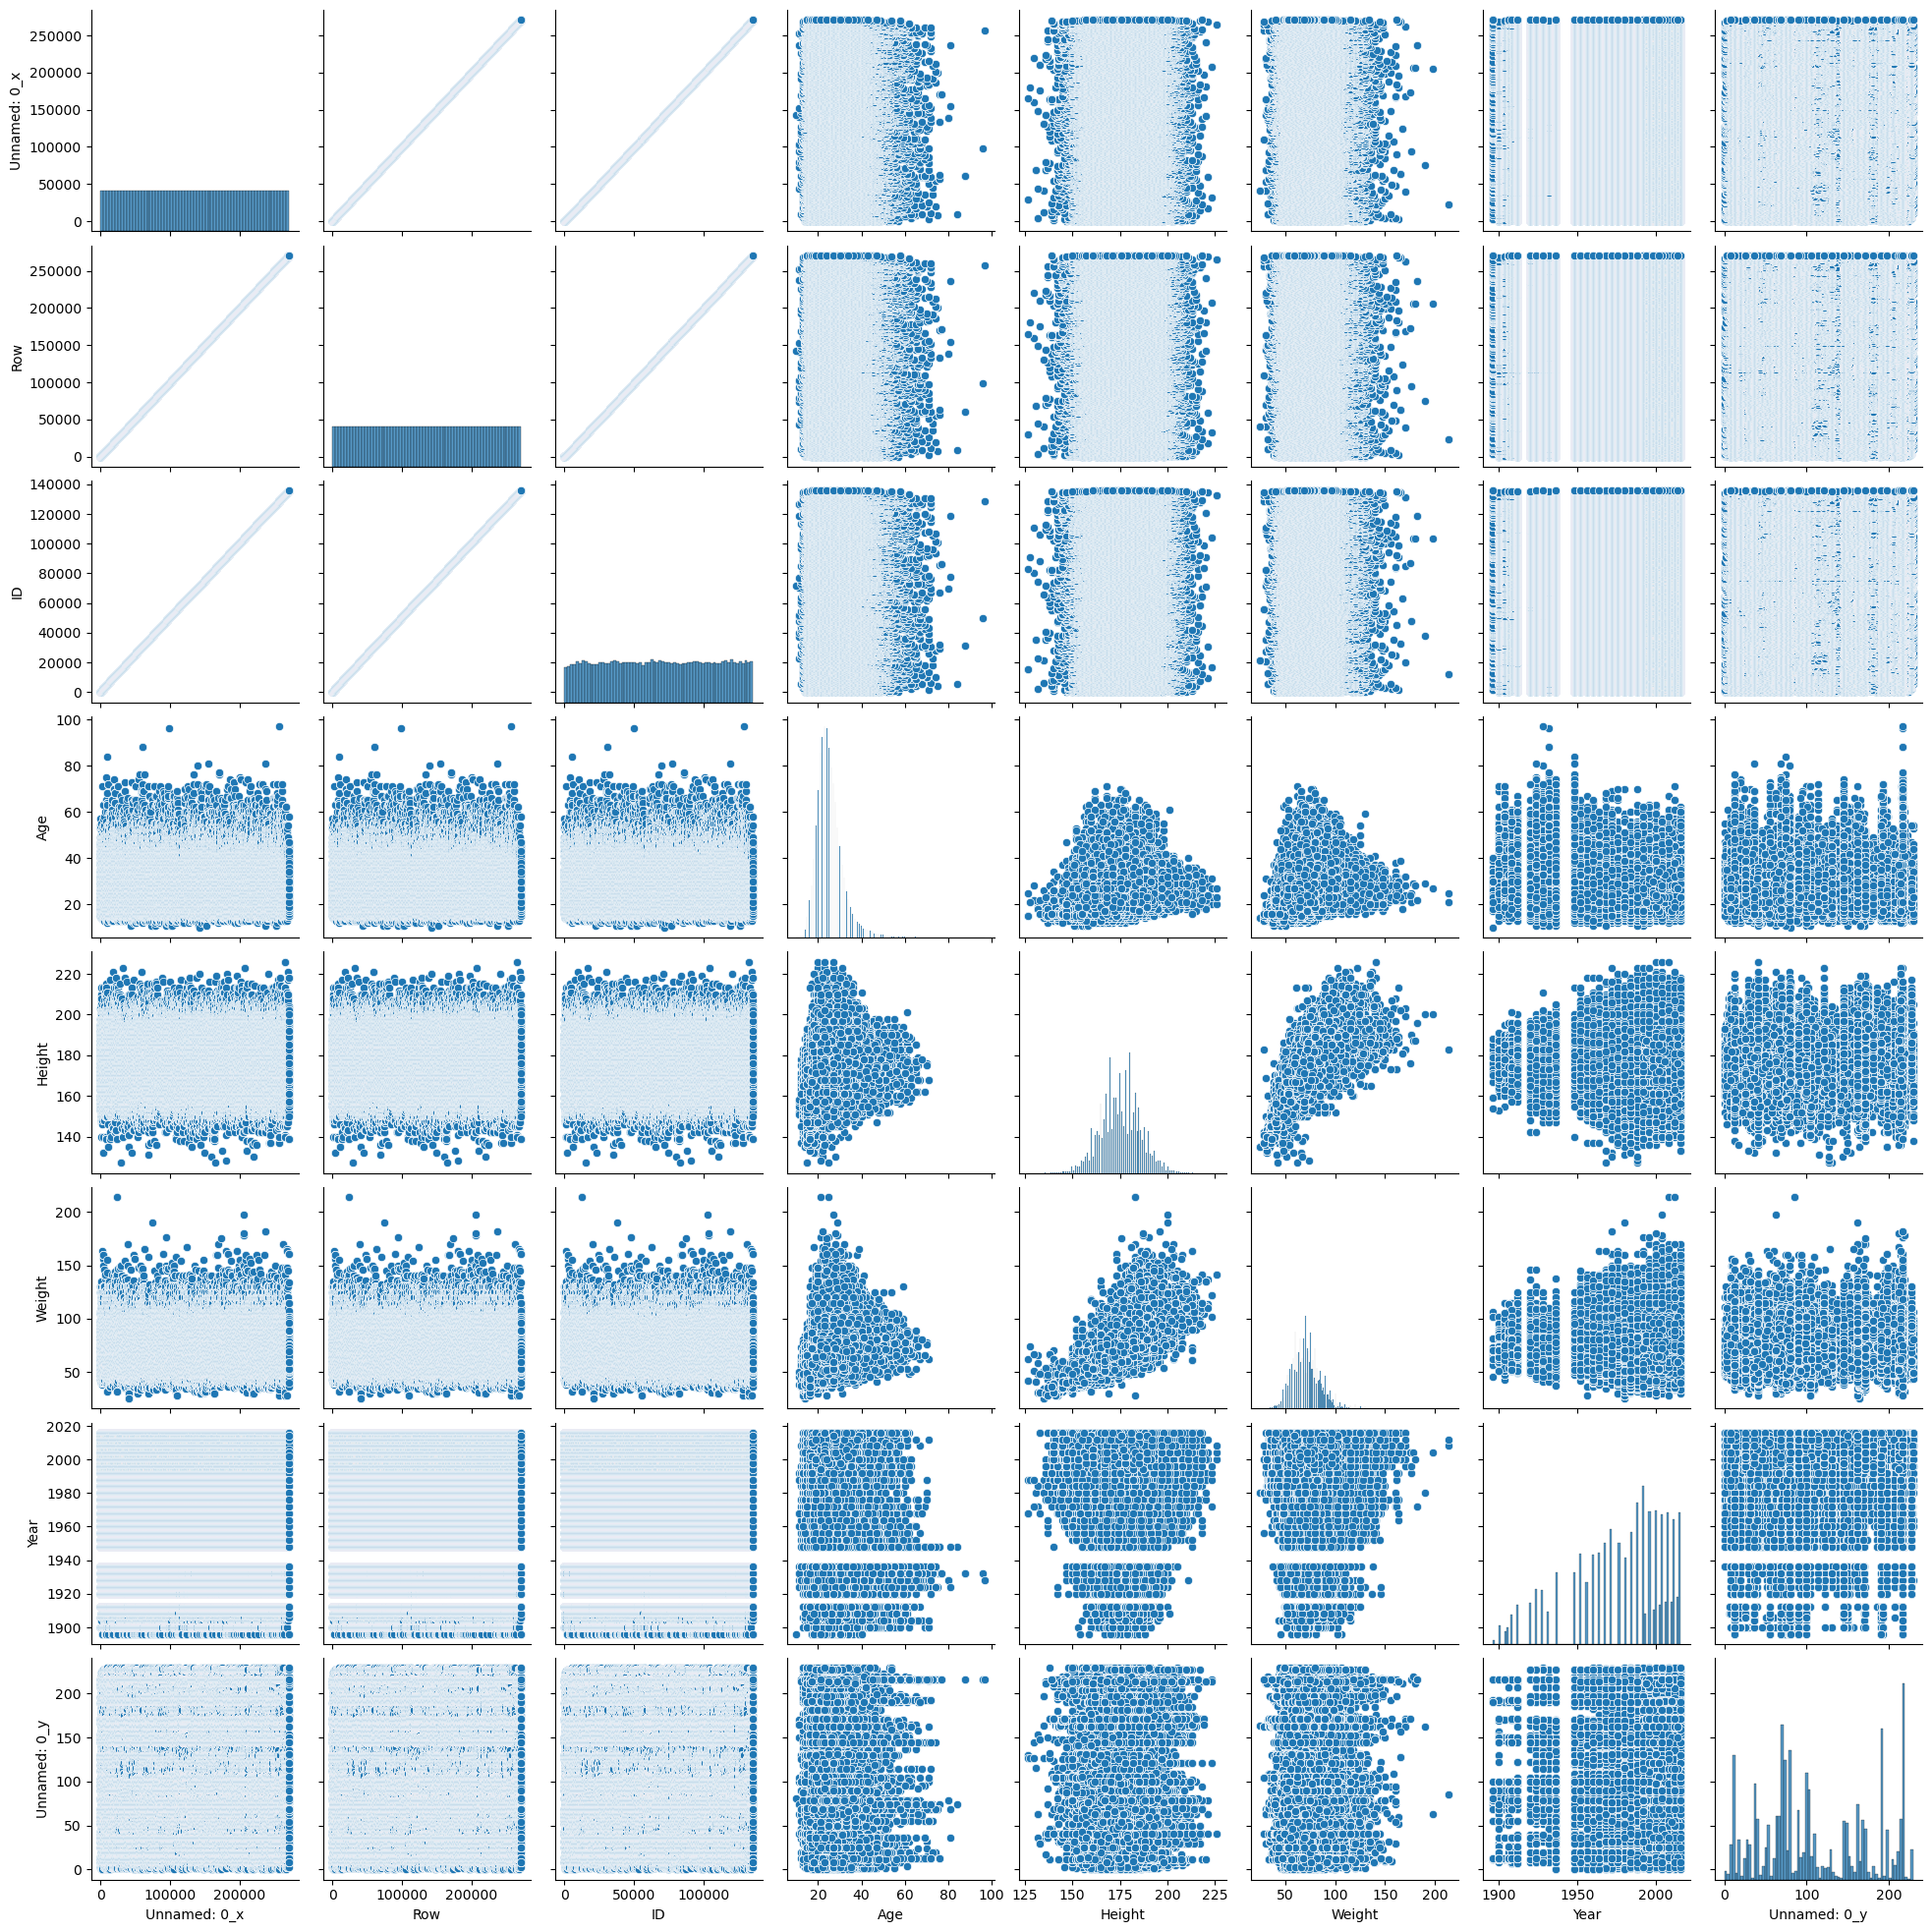

In [14]:
sns.pairplot(merged_clean)

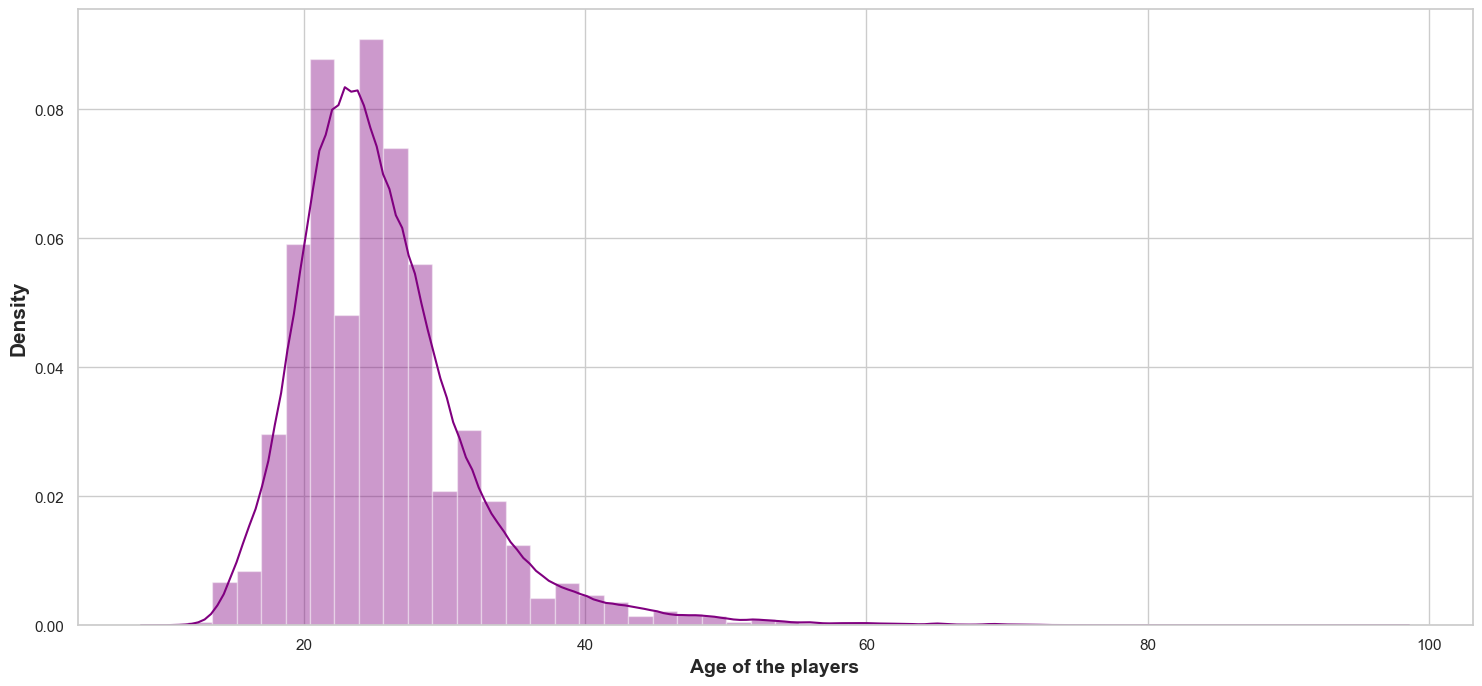

In [16]:

plt.figure(figsize=(18,8))
sns.set(style='whitegrid',)
sns.distplot(merged_clean["Age"], color="purple")
plt.xlabel("Age of the players",fontsize=14, weight="semibold")
plt.ylabel("Density",fontsize=15, weight="semibold")
plt.show()

Text(-6.588958333333329, 0.5, 'Density')

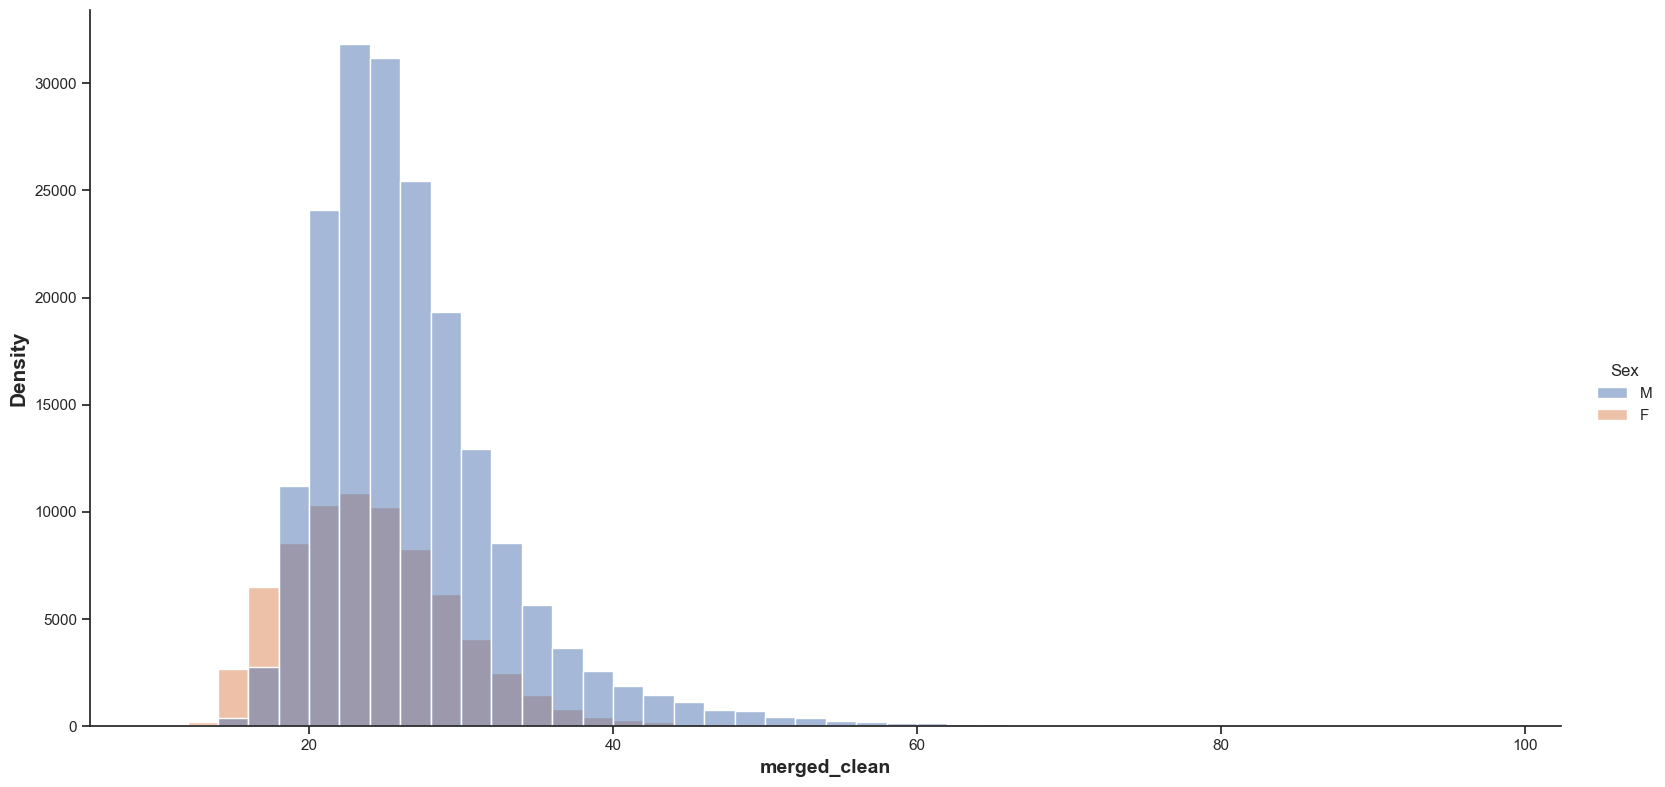

In [18]:

sns.set(style='ticks',)
sns.displot(merged_clean, x="Age", hue="Sex",
            alpha=0.5,
            binwidth=2,
            height=8, aspect=2)
plt.xlabel("merged_clean",fontsize=14, weight="semibold")
plt.ylabel("Density",fontsize=15, weight="semibold")

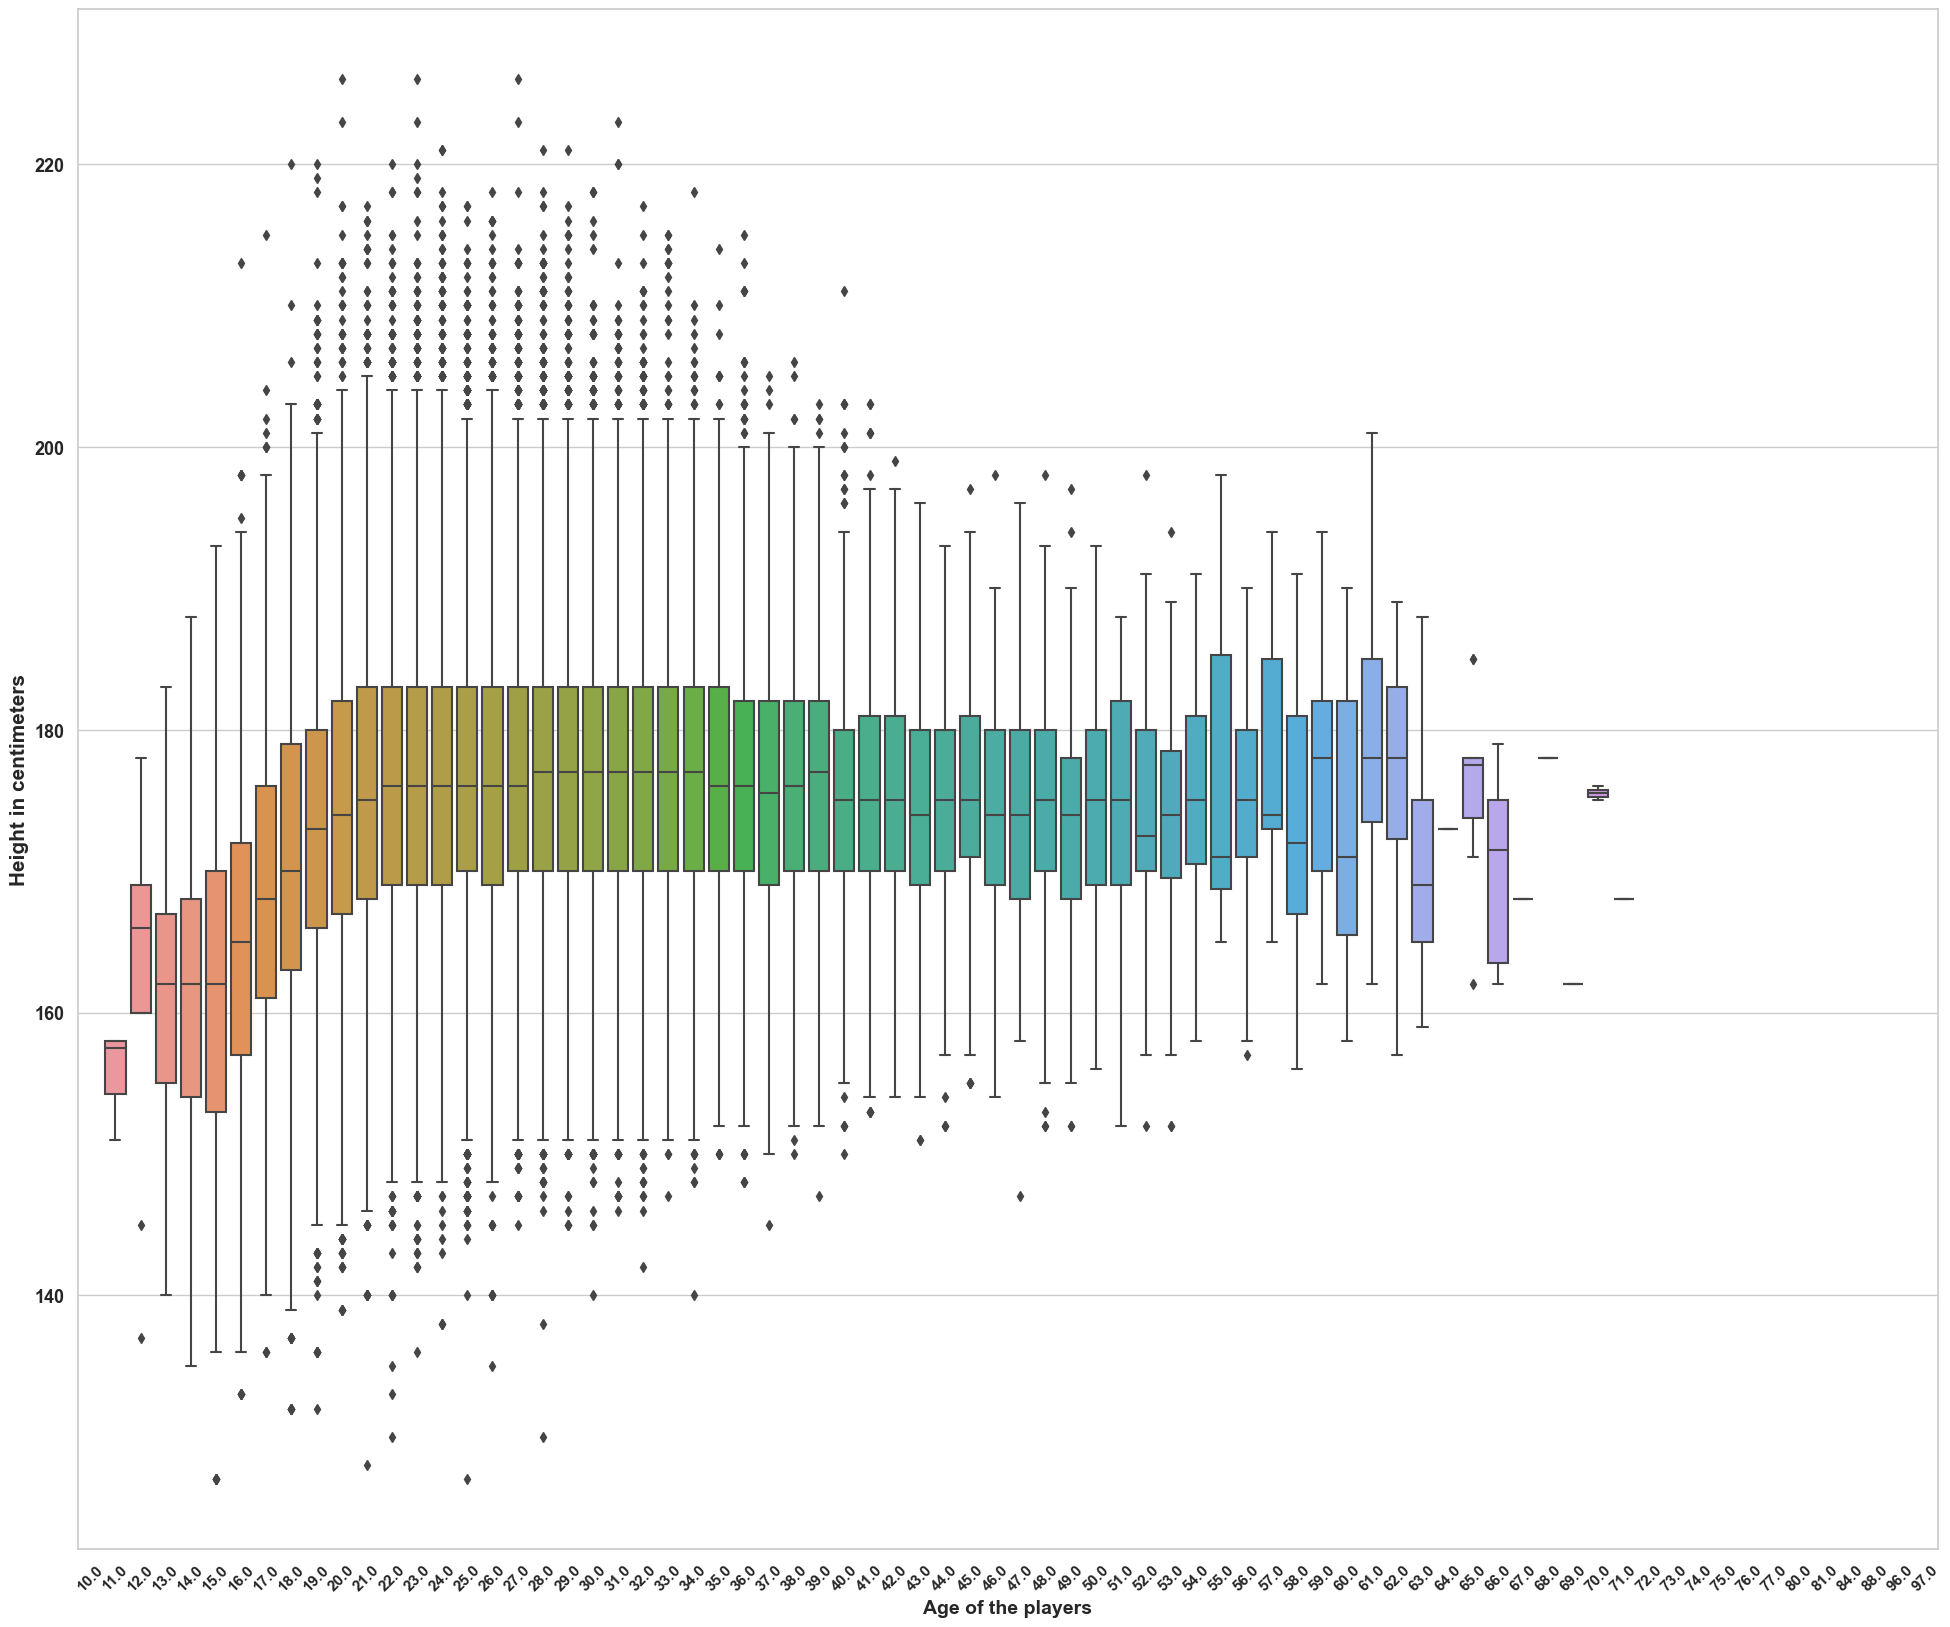

In [19]:
plt.figure(figsize=(24,20))
sns.set(style="whitegrid",)
sns.boxplot(data=merged_clean, x="Age", y="Height")
plt.xticks(rotation=45, weight="semibold")
plt.yticks(weight="semibold", fontsize=13)
plt.xlabel("Age of the players",fontsize=14, weight="semibold")
plt.ylabel("Height in centimeters",fontsize=15, weight="semibold")

plt.show()